In [ ]:
pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.2 MB/s eta 0:00:00


Most likely hidden states: [2 2 0 2 0 1 0 2 0 2 0 1]
probabilitatea este: 7.32594289717248e-08


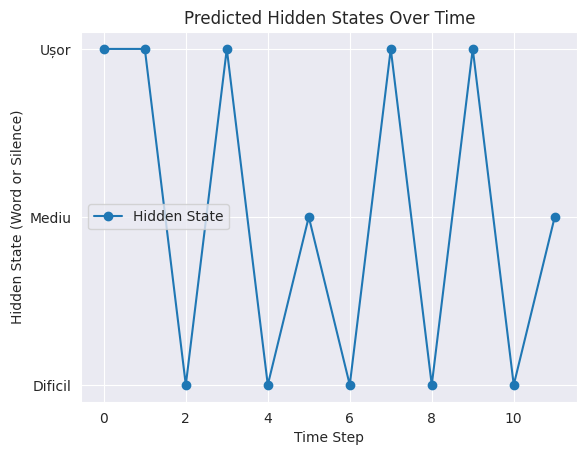

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

# Define the state space (words or silence)
states = ["Dificil", "Mediu", "Ușor"]
n_states = len(states)

# Define the observation space (volume of the speech)
observations = ["FB", "B", "S", "NS"]
n_observations = len(observations)

# Updated initial state distribution: adjusted to reduce the dominance of "Silence"
start_probability = np.array([1/3, 1/3, 1/3])
# Explanation:
# Starting in "Silence" is less dominant now, making it possible to begin with any word.

# Updated state transition probabilities for a more balanced progression
transition_probability = np.array([
    [0.0, 0.5, 0.5],  # Dificil -> poate trece doar la Mediu sau Usor  #
    [0.5, 0.25, 0.25],  # Mediu -> Dificil, Mediu, Usor
    [0.5, 0.25, 0.25]   # Usor ->
])
# Explanation:
# This setup allows the model to naturally transition from "Silence" to words, and from one word to the next,
# while still allowing some chance of returning to previous words or silence.

# Define the observation likelihoods (emission probabilities)
emission_probability = np.array([
      [0.1, 0.2, 0.4, 0.3],  # Dificil
    [0.15, 0.25, 0.5, 0.1],  # Mediu
    [0.2, 0.3, 0.4, 0.1]     # Usor
])
# Explanation:
# The probabilities are adjusted to reflect each word's likelihood of being "Loud" or "Soft."

# Create and configure the HMM model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Define a sequence of observations (observed volume levels over time)
observations_sequence = np.array([0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2]).reshape(-1, 1)
# Explanation:
# This sequence provides a mix of "Loud" (0) and "Soft" (1) observations to test how the model interprets the pattern.

# Predict the most likely hidden states (words or silence) given the observation sequence
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

log_prob = model.score(observations_sequence)
probability = np.exp(log_prob)
print ("probabilitatea este:", probability)
# Plot the results for visualization
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel("Time Step")
plt.ylabel("Hidden State (Word or Silence)")
plt.yticks(ticks=range(n_states), labels=states)
plt.legend()
plt.title("Predicted Hidden States Over Time")
plt.show()